Data source: https://www.plecoforums.com/threads/word-frequency-list-based-on-a-15-billion-character-corpus-bcc-blcu-chinese-corpus.5859/

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv('global_wordfreq.release_UTF-8.txt',sep='\t',names=['Word','Count'])
#df['Frequency'] = np.arange(1,len(df)+1)
df

,Word,Count
0,第,2002074595
1,的,943370349
2,了,255733044
3,在,197672850
4,是,171296602
5,我,169391220
6,和,118878434
7,有,94271573
8,你,88487705
9,个,87859759


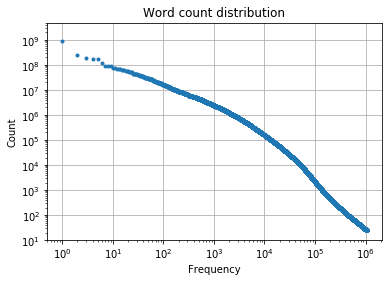

In [26]:
import matplotlib.pyplot as plt

plt.plot(df['Count'],'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.grid(True)
plt.title('Word count distribution')
plt.show()

In [53]:
# Cleans this list by only including words that are pure Chinese characters
# For speed, we'll only use a subset of all the words

# Gets set of hanzi characters
hanzi_df = pd.read_csv('data/chn_hanzi_frequency.csv')
hanzi_set = set(hanzi_df['Character'])

word = []
count = []
# Loops over 
for index, row in df[0:50000].iterrows():
    word_set = set(row['Word'])
    
    # Skips over word if there are non-characters
    if word_set - hanzi_set != set():
        continue
        
    word.append(row['Word'])
    count.append(row['Count'])
    
cleaned_df = pd.DataFrame({'Word':word,'Count':count})
cleaned_df['Frequency'] = np.arange(1,len(cleaned_df)+1)

In [57]:
# Create a dictionary where a Chinese character is a key, and words that use that character are values

chn_character_word_dict = {}
for index, row in cleaned_df.iterrows():
    word = row['Word']
    word_set = set(word)
    
    for x in word_set:
        if x in chn_character_word_dict:
            chn_character_word_dict[x] += [word]
        else:
            chn_character_word_dict[x] = [word]

In [61]:
# Saves dictionaries to pickle
import pickle

with open('data/chn_character_word_dict.pkl', 'wb') as handle:
    pickle.dump(chn_character_word_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)